In [105]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [103]:
pwd

'/home/jupyter-yehlin'

In [102]:
from string import ascii_uppercase, ascii_lowercase
import hashlib, re, os
import numpy as np
import torch
from jax.tree_util import tree_map
from scipy.special import softmax
import gc
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from utils import *

In [98]:
df = pd.read_csv('all_4_ID.csv')

In [99]:
df

,name,sequence,Full Seq PLDDT,Half Masked ESMFold Plddt,Max Half Masked ESMFold Plddt,Half Masked ESMFold Average Plddt,ESM Score,AF_plddt,inter_pae,log10_K50_t,...,deltaG_t_95CI,deltaG_c,deltaG_c_95CI,deltaG,deltaG_95CI,unconditional_CE,conditional_CE,Hybrid Composite Score,ID,method
0,r1_100_JUSTAS,SMKIYKSGSTYSVEFDIGDEVASITVDISNPETGTVYTVTVTAKLE...,72.045494,"[65.39944458007812, 60.94325256347656, 59.4636...",76.322197,65.680644,11.543686,72.862993,11.968352,0.830003,...,0.104801,4.316353,0.104274,3.651201,0.256200,1.960517,1.803558,36.417272,r1_100,JUSTAS
1,r1_100_TrMRF,GLTVTLDGNSLTVTADAGDKTVTVTAPVFHPEKGLVTVVTVTATRE...,58.422199,"[64.6432876586914, 74.1005630493164, 59.182521...",78.155617,68.850083,8.110335,50.909468,23.673170,0.786053,...,0.575364,4.177248,1.138177,3.591087,0.865408,1.970990,1.820189,37.825798,r1_100,TrMRF
2,r1_100_TrROS,GIEIEFDNNYLKITFEWGGKEVTVTFPFFFPDNGHIFTIKFTMYPV...,71.143486,"[62.05292510986328, 60.50865936279297, 64.2653...",70.186874,62.930596,17.194322,70.819495,13.502559,1.122288,...,0.405260,5.937705,0.967804,7.460608,8.652556,2.039084,1.989799,31.626613,r1_100,TrROS
3,r1_100_TrROS_Hall,KITITEENGKLTITVEVDGKTYTVTAEVTLEDGSVVTITSATFTVV...,73.666862,"[75.04656219482422, 72.22345733642578, 72.6325...",76.132233,72.394703,3.552251,81.403271,9.443478,2.092710,...,1.319890,6.199883,2.088269,8.636292,8.819251,1.533093,1.430036,50.624398,r1_100,TrROS_Hall
4,r1_102_JUSTAS,GMESELLEKVTTPFSDGSTLETEIVSLPDGSIKTLTTHTTTDPHTG...,88.693542,"[85.86798095703125, 87.9013442993164, 87.07205...",89.322723,86.912752,6.837507,78.105294,14.683191,-0.035691,...,0.221313,0.432435,0.374085,0.181116,0.372763,1.624691,1.506707,57.683923,r1_102,JUSTAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20663,r20_92_TrROS_Hall,SAGGSAGGSKKISLKDIKKVEVKKNKNGTYEVTIEVNGKKLTLTIK...,64.854721,"[66.70665740966797, 67.7982406616211, 66.52462...",67.956825,66.819820,2.966840,62.568619,16.284712,-0.610889,...,0.389113,2.991442,0.305864,2.246555,0.669409,1.892285,1.572625,42.489366,r20_92,TrROS_Hall
20664,r20_93_JUSTAS,SAGGSAGGSMVTIPTGTEEEVEKVIAELEKKGLKPKKVEKEGNKVT...,71.277779,"[71.19159698486328, 71.97462463378906, 72.5434...",72.929924,70.181142,3.619266,84.365257,27.815495,0.481705,...,0.115853,2.364444,0.284877,1.946196,0.198191,1.669850,1.485257,47.251846,r20_93,JUSTAS
20665,r20_93_TrMRF,SAGGSAGGSGITIPAGSPEKVYELLSALEKLGFKPKKVSVSGNYVI...,61.475655,"[62.65907287597656, 56.4908332824707, 58.47431...",63.021320,58.622167,4.592780,72.783848,15.311255,0.188204,...,0.117152,2.849327,0.078723,2.384975,0.105405,1.605613,1.466734,39.967828,r20_93,TrMRF
20666,r20_93_TrROS,SAGGSAGGSWITIPIKSPEQVEELIDALQKNGFKPKSVERSGNKVT...,70.343445,"[66.56350708007812, 72.6880874633789, 69.33818...",72.688087,68.798295,5.493165,78.416466,11.493505,-0.122531,...,0.052502,1.786440,0.042245,1.506891,0.151120,1.786028,1.846088,37.267063,r20_93,TrROS


In [71]:
df_CE = pd.read_csv('all_4_full_seq_CE.csv')

In [72]:
df_CE=df_CE[:8784]

In [74]:
df_CE.to_csv('all_4_full_seq_CE.csv', index=False)

In [76]:
df.loc[df['name'].str.startswith('r1_'), 'sequence'] = df.loc[df['name'].str.startswith('r1_'), 'sequence'].apply(lambda x: x[:-1])
df.loc[df['name'].str.startswith('r2_'), 'sequence'] = df.loc[df['name'].str.startswith('r2_'), 'sequence'].apply(lambda x: x[5:-6])
df.loc[df['name'].str.startswith('r3_'), 'sequence'] = df.loc[df['name'].str.startswith('r3_'), 'sequence'].apply(lambda x: x[10:-11])
df.loc[df['name'].str.startswith('r4_'), 'sequence'] = df.loc[df['name'].str.startswith('r4_'), 'sequence'].apply(lambda x: x[13:-13])
df.loc[df['name'].str.startswith('r5_'), 'sequence'] = df.loc[df['name'].str.startswith('r5_'), 'sequence'].apply(lambda x: x[3:-3])
df.loc[df['name'].str.startswith('r6_'), 'sequence'] = df.loc[df['name'].str.startswith('r6_'), 'sequence'].apply(lambda x: x[8:-8])

df.loc[df['name'].str.startswith('r7_'), 'sequence'] = df.loc[df['name'].str.startswith('r7_'), 'sequence'].apply(lambda x: x[12:-12])
df.loc[df['name'].str.startswith('r8_'), 'sequence'] = df.loc[df['name'].str.startswith('r8_'), 'sequence'].apply(lambda x: x[4:-5])
df.loc[df['name'].str.startswith('r9_'), 'sequence'] = df.loc[df['name'].str.startswith('r9_'), 'sequence'].apply(lambda x: x[1:-2])
df.loc[df['name'].str.startswith('r10_'), 'sequence'] = df.loc[df['name'].str.startswith('r10_'), 'sequence'].apply(lambda x: x[12:-13])
df.loc[df['name'].str.startswith('r11_'), 'sequence'] = df.loc[df['name'].str.startswith('r11_'), 'sequence'].apply(lambda x: x[11:-12])
df.loc[df['name'].str.startswith('r12_'), 'sequence'] = df.loc[df['name'].str.startswith('r12_'), 'sequence'].apply(lambda x: x[9:-9])


df.loc[df['name'].str.startswith('r13_'), 'sequence'] = df.loc[df['name'].str.startswith('r13_'), 'sequence'].apply(lambda x: x[4:-4])
df.loc[df['name'].str.startswith('r14_'), 'sequence'] = df.loc[df['name'].str.startswith('r14_'), 'sequence'].apply(lambda x: x[2:-3])
df.loc[df['name'].str.startswith('r15_'), 'sequence'] = df.loc[df['name'].str.startswith('r15_'), 'sequence'].apply(lambda x: x[6:-6])
df.loc[df['name'].str.startswith('r16_'), 'sequence'] = df.loc[df['name'].str.startswith('r16_'), 'sequence'].apply(lambda x: x[4:-5])
df.loc[df['name'].str.startswith('r17_'), 'sequence'] = df.loc[df['name'].str.startswith('r17_'), 'sequence'].apply(lambda x: x[11:-12])
df.loc[df['name'].str.startswith('r18_'), 'sequence'] = df.loc[df['name'].str.startswith('r18_'), 'sequence'].apply(lambda x: x[10:-10])

df.loc[df['name'].str.startswith('r19_'), 'sequence'] = df.loc[df['name'].str.startswith('r19_'), 'sequence'].apply(lambda x: x[3:-4])
df.loc[df['name'].str.startswith('r20_'), 'sequence'] = df.loc[df['name'].str.startswith('r20_'), 'sequence'].apply(lambda x: x[9:-9])

In [80]:
df = df.iloc[8784:]

In [89]:
df.reset_index(drop=True)

,name,sequence,Full Seq PLDDT,Half Masked ESMFold Plddt,Max Half Masked ESMFold Plddt,Half Masked ESMFold Average Plddt,ESM Score,AF_plddt,inter_pae,log10_K50_t,...,deltaG_t_95CI,deltaG_c,deltaG_c_95CI,deltaG,deltaG_95CI,unconditional_CE,conditional_CE,Hybrid Composite Score,ID,method
0,r10_0_JUSTAS,SEELLKKNPNYIIVKKVEKVLEAKTPSGKKYTIKTTIYIITKPNELP,57.218830,"[62.9, 55.4, 64.4, 56.3, 59.4, 63.5, 65.3, 52.5]",65.300000,59.962500,4.476974,53.079268,21.093983,0.329481,...,0.198339,2.130715,0.284570,1.842364,0.430075,1.997426,1.836244,32.654966,r10_0,JUSTAS
1,r10_0_TrMRF,IEKFLEKHPELKIKKEIKIKIPYKTKDGKEFEVEYKIFYLTSEDEED,63.779652,"[64.0, 56.9, 57.2, 58.4, 58.4, 62.9, 62.6, 63.2]",64.000000,60.450000,3.500281,65.430098,17.778582,0.379683,...,0.098976,2.742495,0.113054,2.357292,0.141347,2.142961,1.765159,34.246209,r10_0,TrMRF
2,r10_0_TrROS,IEDMAEKNPDWKIVEPIEIEIPYYNPDGKWYEVEYTIFVIVPPGDEI,52.838089,"[51.8, 57.5, 52.1, 55.5, 52.5, 57.1, 54.0, 51.4]",57.500000,53.987500,6.247927,57.772304,18.660334,0.682702,...,0.312948,2.119099,0.149691,1.790492,0.453900,1.985626,1.982895,27.226609,r10_0,TrROS
3,r10_0_TrROS_Hall,IEELAKKYPNIKIVEVKTVKVTETNKDGKKTEKTKTEIKIYKDGEEI,60.292469,"[61.2, 63.6, 63.3, 62.5, 61.5, 61.3, 58.5, 59.6]",63.600000,61.437500,2.746632,59.542326,19.787666,-0.290779,...,0.399364,-15.000000,20.000000,-2.535591,7.045567,1.739721,1.415400,43.406462,r10_0,TrROS_Hall
4,r10_1004_JUSTAS,PSPSTPVTVTVTFPETGETVTLEVTDLEELRERFPDRPVEITVSPGG,49.777870,"[54.5, 49.5, 54.4, 56.4, 57.5, 51.8, 53.9, 54.1]",57.500000,54.012500,2.761983,71.748422,26.054840,1.446762,...,0.128304,2.106323,0.081829,2.422808,0.121393,1.762679,1.579575,34.194330,r10_1004,JUSTAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11879,r20_92_TrROS_Hall,KKISLKDIKKVEVKKNKNGTYEVTIEVNGKKLTLTIKNGKIYLSDE...,64.854721,"[66.70665740966797, 67.7982406616211, 66.52462...",67.956825,66.819820,2.966840,62.568619,16.284712,-0.610889,...,0.389113,2.991442,0.305864,2.246555,0.669409,1.892285,1.572625,42.489366,r20_92,TrROS_Hall
11880,r20_93_JUSTAS,MVTIPTGTEEEVEKVIAELEKKGLKPKKVEKEGNKVTVEFPDGTKV...,71.277779,"[71.19159698486328, 71.97462463378906, 72.5434...",72.929924,70.181142,3.619266,84.365257,27.815495,0.481705,...,0.115853,2.364444,0.284877,1.946196,0.198191,1.669850,1.485257,47.251846,r20_93,JUSTAS
11881,r20_93_TrMRF,GITIPAGSPEKVYELLSALEKLGFKPKKVSVSGNYVIVDFENGIPV...,61.475655,"[62.65907287597656, 56.4908332824707, 58.47431...",63.021320,58.622167,4.592780,72.783848,15.311255,0.188204,...,0.117152,2.849327,0.078723,2.384975,0.105405,1.605613,1.466734,39.967828,r20_93,TrMRF
11882,r20_93_TrROS,WITIPIKSPEQVEELIDALQKNGFKPKSVERSGNKVTVRFPNGIPI...,70.343445,"[66.56350708007812, 72.6880874633789, 69.33818...",72.688087,68.798295,5.493165,78.416466,11.493505,-0.122531,...,0.052502,1.786440,0.042245,1.506891,0.151120,1.786028,1.846088,37.267063,r20_93,TrROS


In [3]:

# version = "1" # @param ["0", "1"]
# model_name = "esmfold_v0.model" if version == "0" else "esmfold.model"


# def parse_output(output):
#   pae = (output["aligned_confidence_probs"][0] * np.arange(64)).mean(-1) * 31
#   plddt = output["plddt"][0,:,1]

#   bins = np.append(0,np.linspace(2.3125,21.6875,63))
#   sm_contacts = softmax(output["distogram_logits"],-1)[0]
#   sm_contacts = sm_contacts[...,bins<8].sum(-1)
#   xyz = output["positions"][-1,0,:,1]
#   mask = output["atom37_atom_exists"][0,:,1] == 1
#   o = {"pae":pae[mask,:][:,mask],
#        "plddt":plddt[mask],
#        "sm_contacts":sm_contacts[mask,:][:,mask],
#        "xyz":xyz[mask],
#        "distogram_logits": output["distogram_logits"]
#       }
#   return o

# def get_hash(x): return hashlib.sha1(x.encode()).hexdigest()
# alphabet_list = list(ascii_uppercase+ascii_lowercase)

# jobname = "test" #@param {type:"string"}
# jobname = re.sub(r'\W+', '', jobname)[:50]

# sequence = "A"*92 #@param {type:"string"}
# sequence = re.sub("[^A-Z:]", "", sequence.replace("/",":").upper())
# sequence = re.sub(":+",":",sequence)
# sequence = re.sub("^[:]+","",sequence)
# sequence = re.sub("[:]+$","",sequence)
# copies = 1 #@param {type:"integer"}
# if copies == "" or copies <= 0: copies = 1
# sequence = ":".join([sequence] * copies)
# num_recycles = 3 #@param ["0", "1", "2", "3", "6", "12", "24"] {type:"raw"}
# chain_linker = 25

# ID = jobname+"_"+get_hash(sequence)[:5]
# seqs = sequence.split(":")
# lengths = [len(s) for s in seqs]
# length = sum(lengths)
# print("length",length)

# u_seqs = list(set(seqs))
# if len(seqs) == 1: mode = "mono"
# elif len(u_seqs) == 1: mode = "homo"
# else: mode = "hetero"

# if "model" not in dir() or model_name != model_name_:
#   if "model" in dir():
#     # delete old model from memory
#     del model
#     gc.collect()
#     if torch.cuda.is_available():
#       torch.cuda.empty_cache()

#   model = torch.load(model_name)
#   model.eval().cuda().requires_grad_(False)
#   model_name_ = model_name

# # optimized for Tesla T4
# if length > 700:
#   model.set_chunk_size(64)
# else:
#   model.set_chunk_size(128)

# torch.cuda.empty_cache()
# output = model.infer(sequence,
#                      num_recycles=num_recycles,
#                      chain_linker="X"*chain_linker,
#                      residue_index_offset=512)

# pdb_str = model.output_to_pdb(output)[0]
# output = tree_map(lambda x: x.cpu().numpy(), output)
# ptm = output["ptm"][0]
# plddt = output["plddt"][0,...,1].mean()
# O = parse_output(output)
# print(f'ptm: {ptm:.3f} plddt: {plddt:.3f}')
# os.system(f"mkdir -p {ID}")
# prefix = f"{ID}/ptm{ptm:.3f}_r{num_recycles}_default"
# # np.savetxt(f"{prefix}.pae.txt",O["pae"],"%.3f")
# with open(f"{prefix}.pdb","w") as out:
#   out.write(pdb_str)

In [93]:
df = df.reset_index(drop=True)

In [94]:
def parse_output(output):
    pae = (output["aligned_confidence_probs"][0] * np.arange(64)).mean(-1) * 31
    plddt = output["plddt"][0,:,1]

    bins = np.append(0,np.linspace(2.3125,21.6875,63))
    sm_contacts = softmax(output["distogram_logits"],-1)[0]
    sm_contacts = sm_contacts[...,bins<8].sum(-1)
    xyz = output["positions"][-1,0,:,1]
    mask = output["atom37_atom_exists"][0,:,1] == 1
    o = {"pae":pae[mask,:][:,mask],
             "plddt":plddt[mask],
             "sm_contacts":sm_contacts[mask,:][:,mask],
             "xyz":xyz[mask],
             "distogram_logits": output["distogram_logits"]}
    return o

def get_hash(x): return hashlib.sha1(x.encode()).hexdigest()
alphabet_list = list(ascii_uppercase+ascii_lowercase)


def esmfold_plddt(model, sequence, num_recycles=0, chain_linker=2, masking_rate= 0.5, get_LM_contacts= True, samples = 8):

    best_pdb_str = None
    best_ptm = 0
    best_output = None
    traj = []
    stochastic_mode = "LM"


    num_samples = 1 if samples is None else samples
    plddt_ls=[]
    for seed in range(num_samples):
        torch.cuda.empty_cache()
        if samples is None:
            seed = "default"
            mask_rate = 0.0
            model.train(False)
        else:
            torch.manual_seed(seed)
            mask_rate = masking_rate if "LM" in stochastic_mode else 0.0
            model.train("SM" in stochastic_mode)

        output = model.infer(sequence,
                                                num_recycles=num_recycles,
                                                chain_linker="X"*chain_linker,
                                                residue_index_offset=512,
                                                mask_rate=mask_rate,
                                                return_contacts=get_LM_contacts)

        pdb_str = model.output_to_pdb(output)[0].cpu()
        output = tree_map(lambda x: x.cpu().numpy(), output)
        ptm = output["ptm"][0]
        plddt = output["plddt"][0,:,1].mean()
        plddt_ls.append(plddt)
        traj.append(parse_output(output))
        print(f'{seed} ptm: {ptm:.3f} plddt: {plddt:.1f}')
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    return plddt_ls
        
def esmfold_dist_CE(model, sequence, query_pdb, num_recycles=0, chain_linker=2, masking_rate= 0.5, get_LM_contacts= True, samples = 8):

    epsilon = 1e-8
    log_CE_ls = []
    CE_ls = []
    plddt_ls = []
    ptm_ls = []
    stochastic_mode = "LM"
    
    query_dist = prep_input(query_pdb)["feat"]

    with torch.no_grad():
        for seed in range(samples):
            if samples is None:
                seed = "default"
                mask_rate = 0.0
                model.train(False)
            else:
                torch.manual_seed(seed)
                mask_rate = masking_rate if "LM" in stochastic_mode else 0.0
                model.train("SM" in stochastic_mode)

            output = model.infer(sequence,
                                num_recycles=num_recycles,
                                chain_linker="X" * chain_linker,
                                residue_index_offset=512)
                                # mask_rate=mask_rate,
                                            # return_contacts=get_LM_contacts
                    
            ptm = output["ptm"].cpu().numpy()[0]
            plddt = output["plddt"].cpu().numpy()[0,:,1].mean()
            plddt_ls.append(plddt)
            ptm_ls.append(ptm)
            


            output_dist_tensor = output["distogram_logits"][0].cpu()
            output_dist_numpy = output_dist_tensor.numpy()
            output_dist = softmax(output_dist_tensor, -1)
            
            log_p= -np.sum(np.log(output_dist+epsilon)*query_dist, axis=-1)
            log_CE = np.sum(log_p)/(len(log_p)*len(log_p))
            log_CE_ls.append(log_CE)
            p = np.sum(output_dist*query_dist, axis=-1)
            CE= np.sum(p)/(len(p)*len(p))
            CE_ls.append(CE)
            print(f'{seed} log_CE: {log_CE:.3f} CE: {CE:.3f}')
            
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        
    return log_CE_ls, CE_ls, plddt_ls, ptm_ls

class CustomDataset(Dataset):
    def __init__(self, df_file):
        self.df = df_file

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        sequence = self.df.loc[idx, 'sequence']
        name = self.df.loc[idx, 'name']
        ID = self.df.loc[idx, 'ID']
        return {'name': name, 'sequence': sequence, 'ID':ID}


def run_seq_sampling_and_save_CE(model_dir, input_csv, output_csv, num_recycles=0, chain_linker=2, masking_rate=0.5, get_LM_contacts=True, samples=8,  batch_size=1):
    custom_dataset = CustomDataset(input_csv)
    data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=False, num_workers=0)  # Adjust num_workers based on your system
    
    model = torch.load(model_dir)
    model.cuda().requires_grad_(False)
    model.trunk.set_chunk_size(128)

    
    for batch_index, batch in enumerate(data_loader):
        try:
            seq = batch['sequence']
            name = batch['name']
            ID = batch['ID'][0]
            pdb_dir = f'top_pdb/{ID}.pdb'
            print(name)
            log_CE_ls, CE_ls, plddt_ls, ptm_ls = esmfold_dist_CE(model, seq, pdb_dir, num_recycles, chain_linker, masking_rate, get_LM_contacts, samples)
            if samples ==1:
                result_df = pd.DataFrame({'name': name, 'sequence': seq, 'log_CE': log_CE_ls,'CE': CE_ls, 'PLDDT': plddt_ls,'PTM': ptm_ls})

            else:        
                result_df = pd.DataFrame({'name': name, 'sequence': seq, 'log_CE': [log_CE_ls],'CE': [CE_ls], 'PLDDT': [plddt_ls],'PTM': [ptm_ls]})

            if os.path.exists(output_csv):
                result_df.to_csv(output_csv, mode='a', header=False, index=False)
            else:
                result_df.to_csv(output_csv, index=False)

            if torch.cuda.is_available():
                torch.cuda.empty_cache()
        except Exception as e: 
            print(f"An error occurred: {e}")
            continue

In [95]:
run_seq_sampling_and_save_CE('esmfold.model', df, 'all_4_full_seq_CE.csv', masking_rate=0, samples=1)

['r10_0_JUSTAS']
0 log_CE: 1.457 CE: 0.458
['r10_0_TrMRF']
0 log_CE: 1.483 CE: 0.481
['r10_0_TrROS']
0 log_CE: 1.611 CE: 0.434
['r10_0_TrROS_Hall']
0 log_CE: 1.786 CE: 0.442
['r10_1004_JUSTAS']
0 log_CE: 2.296 CE: 0.235
['r10_1004_TrMRF']
0 log_CE: 2.588 CE: 0.217
['r10_1004_TrROS']
0 log_CE: 2.834 CE: 0.192
['r10_1004_TrROS_Hall']
0 log_CE: 2.584 CE: 0.204
['r10_1007_JUSTAS']
0 log_CE: 2.460 CE: 0.204
['r10_1007_TrMRF']
0 log_CE: 1.703 CE: 0.292
['r10_1007_TrROS']
0 log_CE: 2.148 CE: 0.234
['r10_1007_TrROS_Hall']
0 log_CE: 2.709 CE: 0.212
['r10_1010_JUSTAS']
0 log_CE: 2.047 CE: 0.380
['r10_1010_TrMRF']
0 log_CE: 1.245 CE: 0.485
['r10_1010_TrROS']
0 log_CE: 1.620 CE: 0.413
['r10_1010_TrROS_Hall']
0 log_CE: 1.696 CE: 0.421
['r10_1014_JUSTAS']
0 log_CE: 2.409 CE: 0.347
['r10_1014_TrMRF']
0 log_CE: 1.768 CE: 0.378
['r10_1014_TrROS']
0 log_CE: 1.994 CE: 0.341
['r10_1014_TrROS_Hall']
0 log_CE: 1.667 CE: 0.393
['r10_1017_JUSTAS']
0 log_CE: 3.285 CE: 0.221
['r10_1017_TrMRF']
0 log_CE: 2.844 C

In [ ]:
def prep_input(pdb, chain=None, mask_gaps=False):
  '''Parse PDB file and return features compatible with TrRosetta'''
  ncac, seq = parse_PDB(pdb,["N","CA","C"], chain=chain)

  # mask gap regions
  if mask_gaps:
    mask = seq != 20
    ncac, seq = ncac[mask], seq[mask]

  N,CA,C = ncac[:,0], ncac[:,1], ncac[:,2]
  CB = extend(C, N, CA, 1.522, 1.927, -2.143)

  dist_ref  = to_len(CB[:,None], CB[None,:])
  omega_ref = to_dih(CA[:,None], CB[:,None], CB[None,:], CA[None,:])
  theta_ref = to_dih( N[:,None], CA[:,None], CB[:,None], CB[None,:])
  phi_ref   = to_ang(CA[:,None], CB[:,None], CB[None,:])

  def mtx2bins_custom(x_ref, bin_edges):
    # Use the custom bin edges for digitization
    x_true = np.digitize(x_ref, bin_edges).astype(np.uint8)
    x_true-=1
    print(x_true)
    return np.eye(len(bin_edges))[x_true]  # +1 to include an extra bin for values beyond the last edge

# Prepend a small negative number to ensure 0 falls into the first positive bin
  bin_edges = np.append(0, np.linspace(2.3125, 21.6875, 63))
  p_dist = mtx2bins_custom(dist_ref, bin_edges)
  return {"seq":N_to_AA(seq), "feat":p_dist, "dist_ref":dist_ref}

In [319]:
def plot_feat(x):
  '''plot each feature'''
  plt.figure(figsize=(4*4,4))
  for n,(k,v) in enumerate(split_feat(x).items()):
    plt.subplot(1,4,n+1); plt.title(k)
    plt.imshow(np.squeeze(v).argmax(-1),cmap="binary")
  plt.show()

In [320]:
pdb = prep_input_2(f"1QYS.pdb")
_feat = pdb["feat"]
_seq = np.eye(20)[AA_to_N(pdb["seq"])]

[[ 0  9 15 ... 63 63 63]
 [ 9  0 12 ... 57 63 63]
 [15 12  0 ... 55 63 63]
 ...
 [63 57 55 ...  0 11 17]
 [63 63 63 ... 11  0 11]
 [63 63 63 ... 17 11  0]]


In [321]:
ESMFold_dist_p = softmax(O["distogram_logits"],-1)[0]

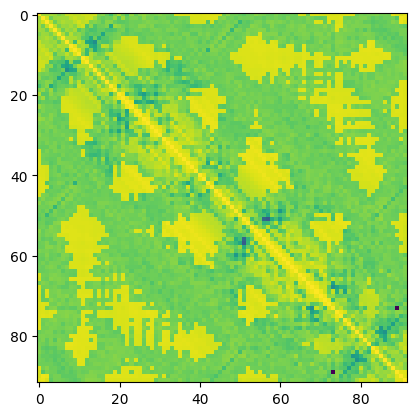

In [322]:
epsilon = 1e-9
plt.imshow(np.sum(np.log(ESMFold_dist_p+epsilon)*_feat, axis=-1))

In [314]:
epsilon = 1e-8
log_CE= -np.sum(np.log(ESMFold_dist_p+epsilon)*_feat, axis=-1)
print(np.sum(log_CE)/(len(log_CE)*len(log_CE)))


CE= np.sum(ESMFold_dist_p*_feat, axis=-1)
print(np.sum(CE)/(len(CE)*len(CE)))

1.637578995291563


In [316]:
CE= np.sum(ESMFold_dist_p*_feat, axis=-1)
print(np.sum(CE)/(len(CE)*len(CE)))

0.35388529805865465


In [323]:
epsilon = 1e-8
log_CE= -np.sum(np.log(ESMFold_dist_p+epsilon)*_feat, axis=-1)
print(np.sum(log_CE)/(len(log_CE)*len(log_CE)))

3.5989881351322555


In [324]:
CE= np.sum(ESMFold_dist_p*_feat, axis=-1)
print(np.sum(CE)/(len(CE)*len(CE)))

0.10524456680317139
